# Introduction

Le présent rapport est une analyse approfondie des données recueillies dans le cadre d'une étude sur les habitudes de sommeil et les comportements de santé associés. Les données ont été collectées auprès d'un échantillon diversifié de participants, et comprennent une gamme de variables telles que l'âge, le genre, les habitudes de sommeil, la consommation de caféine et d'alcool, le tabagisme, et la fréquence de l'exercice. L'objectif de cette analyse est de comprendre les tendances et les associations entre ces variables, ainsi que d'identifier les facteurs qui pourraient influencer la qualité du sommeil et la santé générale des participants.

In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
sheet = pd.read_excel(r'C:\Users\alaak\OneDrive\Bureau\DATA MINING\Sleep_Efficiency_1.xlsx')

In [203]:
df=pd.DataFrame(sheet)

Ci-dessous, vous trouverez un aperçu des 20 premières lignes de mon jeu de données, offrant ainsi un aperçu initial de la structure et des valeurs présentes dans l'ensemble de données.

In [204]:
df.head(20)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,NaN,0.0,No,1.0
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2.0,50.0,0.0,Yes,1.0
7,8,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.0,0.90,28,52,20,0.0,50.0,0.0,Yes,3.0
8,9,41,Female,2021-04-05 02:30:00,2021-04-05 08:30:00,6.0,0.79,28,55,17,3.0,50.0,0.0,No,1.0
9,10,11,Female,2021-09-16 01:00:00,2021-09-16 10:00:00,9.0,0.55,18,37,45,4.0,0.0,0.0,No,0.0


In [205]:
df.shape

(452, 15)

In [206]:
print(df.dtypes)

ID                                 int64
Age                                int64
Gender                            object
Bedtime                   datetime64[ns]
Wakeup time               datetime64[ns]
Sleep duration                   float64
Sleep efficiency                 float64
REM sleep percentage               int64
Deep sleep percentage              int64
Light sleep percentage             int64
Awakenings                       float64
Caffeine consumption             float64
Alcohol consumption              float64
Smoking status                    object
Exercise frequency               float64
dtype: object


on a 46 ligne de valeur null dans la colonne "sleep efficiency "

In [207]:
df['Sleep efficiency'].value_counts(dropna=False)

NaN     46
0.90    25
0.87    21
0.95    19
0.94    18
0.93    16
0.91    15
0.92    12
0.88    11
0.77    11
0.85    11
0.86    11
0.84    11
0.71    10
0.81    10
0.80    10
0.72    10
0.83     9
0.78     9
0.68     9
0.82     9
0.50     8
0.64     8
0.75     8
0.79     8
0.54     8
0.51     8
0.67     8
0.73     7
0.63     7
0.66     7
0.89     7
0.76     7
0.53     6
0.96     6
0.52     6
0.55     6
0.60     5
0.74     4
0.62     4
0.65     3
0.98     3
0.58     3
0.61     2
0.56     2
0.57     2
0.70     2
0.59     2
0.97     1
0.99     1
Name: Sleep efficiency, dtype: int64

In [208]:
df=df.dropna(subset=['Sleep efficiency'])

Nous avons supprimé les lignes qui contiennent des valeurs nulles dans la colonne 'Sleep efficiency

In [209]:
df.shape

(406, 15)

In [210]:
df.head(20)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,NaN,0.0,No,1.0
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2.0,50.0,0.0,Yes,1.0
7,8,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.0,0.90,28,52,20,0.0,50.0,0.0,Yes,3.0
8,9,41,Female,2021-04-05 02:30:00,2021-04-05 08:30:00,6.0,0.79,28,55,17,3.0,50.0,0.0,No,1.0
9,10,11,Female,2021-09-16 01:00:00,2021-09-16 10:00:00,9.0,0.55,18,37,45,4.0,0.0,0.0,No,0.0


Je souhaite remplacer toutes les lignes nulles dans la colonne 'Alcohol consumption' par 0.

In [211]:
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(0)


In [212]:
df.head(20)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,NaN,0.0,No,1.0
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2.0,50.0,0.0,Yes,1.0
7,8,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.0,0.90,28,52,20,0.0,50.0,0.0,Yes,3.0
8,9,41,Female,2021-04-05 02:30:00,2021-04-05 08:30:00,6.0,0.79,28,55,17,3.0,50.0,0.0,No,1.0
9,10,11,Female,2021-09-16 01:00:00,2021-09-16 10:00:00,9.0,0.55,18,37,45,4.0,0.0,0.0,No,0.0


In [213]:
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Duplicate Rows except first occurrence based on all columns are :


(0, 15)

Je n'ai aucune colonne dupliquée.

Je vais changer les valeurs dans la colonne 'Sleep efficiency' en utilisant cette échelle :
90-100%: Efficacité du sommeil excellente.
80-89%: Bonne efficacité du sommeil.
70-79%: Efficacité du sommeil moyenne.
En dessous de 80%: Efficacité du sommeil médiocre.

In [214]:
def assign_label(value):
    if 0.9 <= value <= 1:
        return 'Efficacité du sommeil excellente'
    elif 0.8 <= value < 0.9:
        return 'Bonne efficacité du sommeil.'
    elif 0.7 <= value < 0.8:
        return 'Efficacité du sommeil moyenne.'
    elif value < 0.7:
        return 'Efficacité du sommeil médiocre.'
    else:
        return 'Unknown'

df['Sleep efficiency']=df['Sleep efficiency'].map(assign_label)

In [215]:
df.head(20)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,Bonne efficacité du sommeil.,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,Efficacité du sommeil médiocre.,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,Bonne efficacité du sommeil.,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,Efficacité du sommeil médiocre.,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,Efficacité du sommeil moyenne.,27,55,18,3.0,0.0,3.0,No,3.0
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,Efficacité du sommeil excellente,23,60,17,0.0,NaN,0.0,No,1.0
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,Efficacité du sommeil médiocre.,28,25,47,2.0,50.0,0.0,Yes,1.0
7,8,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.0,Efficacité du sommeil excellente,28,52,20,0.0,50.0,0.0,Yes,3.0
8,9,41,Female,2021-04-05 02:30:00,2021-04-05 08:30:00,6.0,Efficacité du sommeil moyenne.,28,55,17,3.0,50.0,0.0,No,1.0
9,10,11,Female,2021-09-16 01:00:00,2021-09-16 10:00:00,9.0,Efficacité du sommeil médiocre.,18,37,45,4.0,0.0,0.0,No,0.0


Je souhaite remplacer toutes les lignes nulles dans les colonnes 'Awakenings' et 'Caffeine consumption'  par 0.

In [216]:
values={'Awakenings':0,'Caffeine consumption':0}
df.fillna(value=values,inplace=True)

In [217]:
df.head(20)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,Bonne efficacité du sommeil.,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,Efficacité du sommeil médiocre.,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,Bonne efficacité du sommeil.,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,Efficacité du sommeil médiocre.,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,Efficacité du sommeil moyenne.,27,55,18,3.0,0.0,3.0,No,3.0
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,Efficacité du sommeil excellente,23,60,17,0.0,0.0,0.0,No,1.0
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,Efficacité du sommeil médiocre.,28,25,47,2.0,50.0,0.0,Yes,1.0
7,8,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.0,Efficacité du sommeil excellente,28,52,20,0.0,50.0,0.0,Yes,3.0
8,9,41,Female,2021-04-05 02:30:00,2021-04-05 08:30:00,6.0,Efficacité du sommeil moyenne.,28,55,17,3.0,50.0,0.0,No,1.0
9,10,11,Female,2021-09-16 01:00:00,2021-09-16 10:00:00,9.0,Efficacité du sommeil médiocre.,18,37,45,4.0,0.0,0.0,No,0.0


In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [219]:
df['Sleep efficiency'].value_counts(normalize=True)

Efficacité du sommeil excellente    0.285714
Bonne efficacité du sommeil.        0.270936
Efficacité du sommeil médiocre.     0.256158
Efficacité du sommeil moyenne.      0.187192
Name: Sleep efficiency, dtype: float64

Voici les pourcentages dans la colonne "Efficacité du sommeil" (où la majorité des gens ont une efficacité du sommeil médiocre).

In [220]:
df=df.dropna(subset=['Sleep duration'])

J'ai supprimé toutes les valeurs nulles de la colonne 'Durée du sommeil' afin de calculer l'écart type

In [221]:
df['Sleep duration'].value_counts(dropna=False)

7.0     122
8.0      78
7.5      74
6.0      26
8.5      24
9.0      23
10.0      8
5.0       6
5.5       1
Name: Sleep duration, dtype: int64

In [222]:
df['Sleep duration'].std()

0.8739842690069709

Après avoir constaté que l'écart type de la colonne 'Durée du sommeil' est de 0.8739842690069709, je peux conclure que la plupart des valeurs de la durée du sommeil sont proches de la moyenne.

In [223]:
df.describe()

,ID,Age,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,362.000000,362.000000,362.000000,362.000000,362.00000,362.000000,362.000000,362.000000,362.000000,357.000000
mean,227.314917,39.704420,7.501381,22.696133,53.00000,24.303867,1.591160,22.928177,1.118785,1.778711
std,131.502379,13.143084,0.873984,3.545734,15.47798,15.165621,1.384012,30.956413,1.616991,1.431506
min,1.000000,9.000000,5.000000,15.000000,20.00000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,116.250000,29.000000,7.000000,20.000000,51.25000,15.000000,0.000000,0.000000,0.000000,0.000000
50%,226.000000,39.000000,7.500000,22.000000,58.00000,18.000000,1.000000,0.000000,0.000000,2.000000
75%,343.750000,50.750000,8.000000,25.000000,63.00000,22.000000,3.000000,50.000000,2.000000,3.000000
max,451.000000,69.000000,10.000000,30.000000,75.00000,63.000000,4.000000,200.000000,5.000000,5.000000


Ici, vous pouvez voir la table statistique de toutes les valeurs numériques.

In [224]:
df_Jeunes_Adultes=df[(df['Age'] >= 20) & (df['Age'] <= 35)]

Ici, nous sélectionnons une partie du dataframe , qui correspond à la catégorie des jeunes adultes, afin d'examiner les statistiques.

In [225]:
df_Jeunes_Adultes.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,Efficacité du sommeil médiocre.,28,25,47,2.0,50.0,0.0,Yes,1.0
12,13,30,Female,2021-08-07 02:30:00,2021-08-07 11:30:00,9.0,Efficacité du sommeil excellente,24,58,18,0.0,50.0,0.0,No,1.0
13,14,28,Male,2021-02-25 01:00:00,2021-02-25 09:30:00,8.5,Efficacité du sommeil médiocre.,28,25,47,4.0,0.0,0.0,No,3.0
15,16,32,Female,2021-12-06 22:00:00,2021-12-06 05:30:00,7.5,Efficacité du sommeil excellente,25,55,20,0.0,50.0,2.0,No,5.0
16,17,21,Female,2021-03-24 01:00:00,2021-03-24 08:00:00,7.0,Efficacité du sommeil médiocre.,28,22,50,4.0,0.0,2.0,Yes,0.0


In [226]:
df_Jeunes_Adultes['Sleep efficiency'].value_counts(normalize=True)

Efficacité du sommeil excellente    0.272727
Bonne efficacité du sommeil.        0.272727
Efficacité du sommeil médiocre.     0.265152
Efficacité du sommeil moyenne.      0.189394
Name: Sleep efficiency, dtype: float64

La grande majorité des jeunes adultes ont une efficacité de sommeil médiocre.

In [227]:
df_Jeunes_Adultes['Smoking status'].value_counts(normalize=True)

No     0.628788
Yes    0.371212
Name: Smoking status, dtype: float64

Malgré le fait que la majorité des jeunes adultes dans cette DataFrame ne fument pas

In [228]:
df_Jeunes_Adultes['Exercise frequency'].value_counts(normalize=True)

1.0    0.379845
2.0    0.209302
0.0    0.193798
3.0    0.147287
5.0    0.046512
4.0    0.023256
Name: Exercise frequency, dtype: float64

In [229]:
df_Jeunes_Adultes['Caffeine consumption'].value_counts(normalize=True)

0.0      0.356061
50.0     0.310606
25.0     0.212121
75.0     0.098485
200.0    0.015152
100.0    0.007576
Name: Caffeine consumption, dtype: float64

In [230]:
sport={0:'Aucun exercice',1:'Exercice très rare',2:'Exercice peu fréquent',3:'Exercice modéré',4:'Exercice régulier',5:' Exercice très fréquent'}
df2=df_Jeunes_Adultes
df2=df2['Exercise frequency'].map(sport)

In [231]:
df2.head()

6          Exercice très rare
12         Exercice très rare
13            Exercice modéré
15     Exercice très fréquent
16             Aucun exercice
Name: Exercise frequency, dtype: object

In [232]:
df_Jeunes_Adultes.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,Efficacité du sommeil médiocre.,28,25,47,2.0,50.0,0.0,Yes,1.0
12,13,30,Female,2021-08-07 02:30:00,2021-08-07 11:30:00,9.0,Efficacité du sommeil excellente,24,58,18,0.0,50.0,0.0,No,1.0
13,14,28,Male,2021-02-25 01:00:00,2021-02-25 09:30:00,8.5,Efficacité du sommeil médiocre.,28,25,47,4.0,0.0,0.0,No,3.0
15,16,32,Female,2021-12-06 22:00:00,2021-12-06 05:30:00,7.5,Efficacité du sommeil excellente,25,55,20,0.0,50.0,2.0,No,5.0
16,17,21,Female,2021-03-24 01:00:00,2021-03-24 08:00:00,7.0,Efficacité du sommeil médiocre.,28,22,50,4.0,0.0,2.0,Yes,0.0


In [233]:
df3=df_Jeunes_Adultes
df3.loc[:,'Exercise frequency']=df3['Exercise frequency'].map(sport)

C:\Users\alaak\AppData\Local\Temp\ipykernel_3600\2274983545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:,'Exercise frequency']=df3['Exercise frequency'].map(sport)


In [234]:
df3.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,Efficacité du sommeil médiocre.,28,25,47,2.0,50.0,0.0,Yes,Exercice très rare
12,13,30,Female,2021-08-07 02:30:00,2021-08-07 11:30:00,9.0,Efficacité du sommeil excellente,24,58,18,0.0,50.0,0.0,No,Exercice très rare
13,14,28,Male,2021-02-25 01:00:00,2021-02-25 09:30:00,8.5,Efficacité du sommeil médiocre.,28,25,47,4.0,0.0,0.0,No,Exercice modéré
15,16,32,Female,2021-12-06 22:00:00,2021-12-06 05:30:00,7.5,Efficacité du sommeil excellente,25,55,20,0.0,50.0,2.0,No,Exercice très fréquent
16,17,21,Female,2021-03-24 01:00:00,2021-03-24 08:00:00,7.0,Efficacité du sommeil médiocre.,28,22,50,4.0,0.0,2.0,Yes,Aucun exercice


In [235]:
df4=df_Jeunes_Adultes

In [236]:
df4.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,Efficacité du sommeil médiocre.,28,25,47,2.0,50.0,0.0,Yes,Exercice très rare
12,13,30,Female,2021-08-07 02:30:00,2021-08-07 11:30:00,9.0,Efficacité du sommeil excellente,24,58,18,0.0,50.0,0.0,No,Exercice très rare
13,14,28,Male,2021-02-25 01:00:00,2021-02-25 09:30:00,8.5,Efficacité du sommeil médiocre.,28,25,47,4.0,0.0,0.0,No,Exercice modéré
15,16,32,Female,2021-12-06 22:00:00,2021-12-06 05:30:00,7.5,Efficacité du sommeil excellente,25,55,20,0.0,50.0,2.0,No,Exercice très fréquent
16,17,21,Female,2021-03-24 01:00:00,2021-03-24 08:00:00,7.0,Efficacité du sommeil médiocre.,28,22,50,4.0,0.0,2.0,Yes,Aucun exercice


In [237]:
df_Jeunes_Adultes.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,Efficacité du sommeil médiocre.,28,25,47,2.0,50.0,0.0,Yes,Exercice très rare
12,13,30,Female,2021-08-07 02:30:00,2021-08-07 11:30:00,9.0,Efficacité du sommeil excellente,24,58,18,0.0,50.0,0.0,No,Exercice très rare
13,14,28,Male,2021-02-25 01:00:00,2021-02-25 09:30:00,8.5,Efficacité du sommeil médiocre.,28,25,47,4.0,0.0,0.0,No,Exercice modéré
15,16,32,Female,2021-12-06 22:00:00,2021-12-06 05:30:00,7.5,Efficacité du sommeil excellente,25,55,20,0.0,50.0,2.0,No,Exercice très fréquent
16,17,21,Female,2021-03-24 01:00:00,2021-03-24 08:00:00,7.0,Efficacité du sommeil médiocre.,28,22,50,4.0,0.0,2.0,Yes,Aucun exercice


In [238]:
df_Jeunes_Adultes=df[(df['Age'] >= 20) & (df['Age'] <= 35)]

In [239]:
df_Jeunes_Adultes.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,Efficacité du sommeil médiocre.,28,25,47,2.0,50.0,0.0,Yes,1.0
12,13,30,Female,2021-08-07 02:30:00,2021-08-07 11:30:00,9.0,Efficacité du sommeil excellente,24,58,18,0.0,50.0,0.0,No,1.0
13,14,28,Male,2021-02-25 01:00:00,2021-02-25 09:30:00,8.5,Efficacité du sommeil médiocre.,28,25,47,4.0,0.0,0.0,No,3.0
15,16,32,Female,2021-12-06 22:00:00,2021-12-06 05:30:00,7.5,Efficacité du sommeil excellente,25,55,20,0.0,50.0,2.0,No,5.0
16,17,21,Female,2021-03-24 01:00:00,2021-03-24 08:00:00,7.0,Efficacité du sommeil médiocre.,28,22,50,4.0,0.0,2.0,Yes,0.0


In [240]:
sport={0:'Aucun exercice',1:'Exercice très rare',2:'Exercice peu fréquent',3:'Exercice modéré',4:'Exercice régulier',5:' Exercice très fréquent'}
df_Jeunes_Adultes['Exercise frequency']=df_Jeunes_Adultes['Exercise frequency'].map(sport)

C:\Users\alaak\AppData\Local\Temp\ipykernel_3600\4239197284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Jeunes_Adultes['Exercise frequency']=df_Jeunes_Adultes['Exercise frequency'].map(sport)


In [241]:
df_Jeunes_Adultes.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,Efficacité du sommeil médiocre.,28,25,47,2.0,50.0,0.0,Yes,Exercice très rare
12,13,30,Female,2021-08-07 02:30:00,2021-08-07 11:30:00,9.0,Efficacité du sommeil excellente,24,58,18,0.0,50.0,0.0,No,Exercice très rare
13,14,28,Male,2021-02-25 01:00:00,2021-02-25 09:30:00,8.5,Efficacité du sommeil médiocre.,28,25,47,4.0,0.0,0.0,No,Exercice modéré
15,16,32,Female,2021-12-06 22:00:00,2021-12-06 05:30:00,7.5,Efficacité du sommeil excellente,25,55,20,0.0,50.0,2.0,No,Exercice très fréquent
16,17,21,Female,2021-03-24 01:00:00,2021-03-24 08:00:00,7.0,Efficacité du sommeil médiocre.,28,22,50,4.0,0.0,2.0,Yes,Aucun exercice


voila on change les valeurs de la colonne 'Exercise frequency' par cette echelle:

0 : Aucun exercice

1 : Exercice très rare

2 : Exercice peu fréquent.

3 : Exercice modéré

4 : Exercice régulier

5 : Exercice très fréquent

In [242]:
df_Jeunes_Adultes['Exercise frequency'].value_counts(normalize=True)

Exercice très rare         0.379845
Exercice peu fréquent      0.209302
Aucun exercice             0.193798
Exercice modéré            0.147287
 Exercice très fréquent    0.046512
Exercice régulier          0.023256
Name: Exercise frequency, dtype: float64

ici, la plupart des jeunes adultes font très rarement de l'exercice ou n'en font pas du tout, ce qui peut avoir une influence sur l'efficacité du sommeil

In [244]:
df_sportife = df_Jeunes_Adultes[
    (df_Jeunes_Adultes['Exercise frequency'] == 'Exercice modéré') | 
    (df_Jeunes_Adultes['Exercise frequency'] == 'Exercice régulier') | 
    (df_Jeunes_Adultes['Exercise frequency'] == 'Exercice très fréquent')
]

Donc, ici, je sélectionne la partie dans laquelle les jeunes adultes pratiquent régulièrement un sport au minimum

In [246]:
df_sportife 

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
13,14,28,Male,2021-02-25 01:00:00,2021-02-25 09:30:00,8.5,Efficacité du sommeil médiocre.,28,25,47,4.0,0.0,0.0,No,Exercice modéré
28,29,23,Male,2021-11-08 21:30:00,2021-11-08 06:30:00,9.0,Efficacité du sommeil médiocre.,27,20,53,3.0,0.0,0.0,No,Exercice modéré
30,31,24,Male,2021-08-10 00:00:00,2021-08-10 07:00:00,7.0,Efficacité du sommeil médiocre.,27,20,53,3.0,0.0,1.0,Yes,Exercice modéré
64,65,30,Male,2021-04-24 01:30:00,2021-04-24 09:00:00,7.5,Bonne efficacité du sommeil.,20,70,10,1.0,0.0,0.0,No,Exercice modéré
65,66,21,Male,2021-02-21 01:00:00,2021-02-21 09:00:00,8.0,Efficacité du sommeil moyenne.,19,63,18,4.0,0.0,3.0,No,Exercice modéré
111,112,25,Male,2021-10-26 23:00:00,2021-10-26 06:00:00,7.0,Efficacité du sommeil excellente,20,65,15,0.0,100.0,0.0,No,Exercice modéré
115,116,22,Male,2021-08-04 00:00:00,2021-08-04 07:00:00,7.0,Efficacité du sommeil médiocre.,27,20,53,2.0,0.0,5.0,Yes,Exercice modéré
125,126,25,Male,2021-05-31 22:30:00,2021-05-31 06:30:00,8.0,Efficacité du sommeil moyenne.,28,51,21,2.0,25.0,0.0,No,Exercice modéré
129,130,25,Male,2021-07-20 21:00:00,2021-07-20 04:00:00,7.0,Efficacité du sommeil moyenne.,18,65,17,2.0,50.0,0.0,No,Exercice modéré
170,171,24,Male,2021-10-20 21:30:00,2021-10-20 05:30:00,8.0,Bonne efficacité du sommeil.,27,55,18,0.0,0.0,3.0,No,Exercice modéré


In [247]:
df_sportife.value_counts(normalize=True)

ID   Age  Gender  Bedtime              Wakeup time          Sleep duration  Sleep efficiency                  REM sleep percentage  Deep sleep percentage  Light sleep percentage  Awakenings  Caffeine consumption  Alcohol consumption  Smoking status  Exercise frequency
14   28   Male    2021-02-25 01:00:00  2021-02-25 09:30:00  8.5             Efficacité du sommeil médiocre.   28                    25                     47                      4.0         0.0                   0.0                  No              Exercice modéré       0.045455
29   23   Male    2021-11-08 21:30:00  2021-11-08 06:30:00  9.0             Efficacité du sommeil médiocre.   27                    20                     53                      3.0         0.0                   0.0                  No              Exercice modéré       0.045455
435  28   Female  2021-08-11 23:00:00  2021-08-11 07:00:00  8.0             Efficacité du sommeil excellente  22                    63                     15            

Ici, les jeunes adultes qui pratiquent régulièrement un sport ont une efficacité de sommeil meilleure que ceux qui n'en pratiquent pas


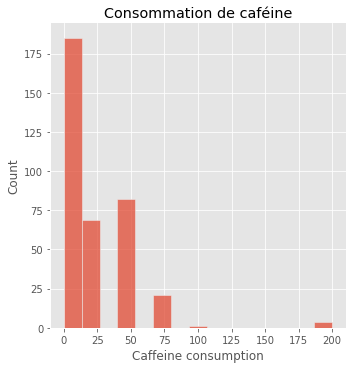

In [249]:
sns.displot(df['Caffeine consumption'], kde=False)
plt.title("Consommation de caféine")
plt.show()

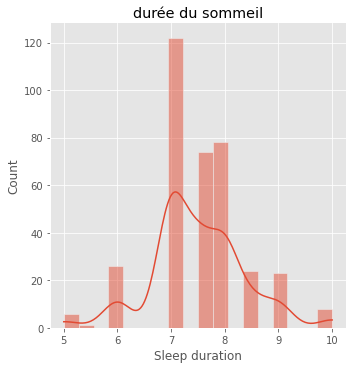

In [250]:
sns.displot(df['Sleep duration'], kde=True)
plt.title("durée du sommeil")
plt.show()

Ici, nous avons le diagramme de la durée du sommeil.

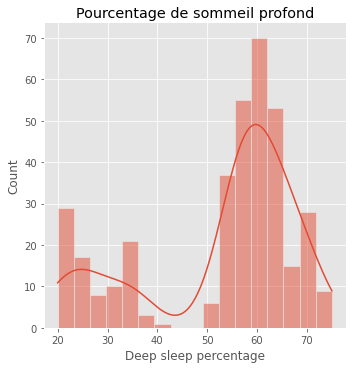

In [252]:
sns.displot(df['Deep sleep percentage'], kde=True)
plt.title("Pourcentage de sommeil profond")
plt.show()

Ici, nous avons le diagramme de Pourcentage de sommeil profond.

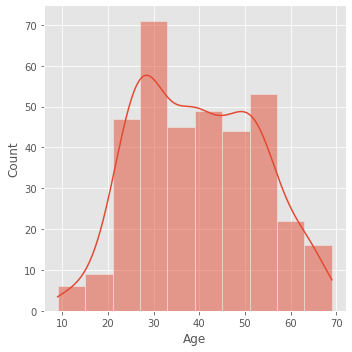

In [254]:
sns.displot(df['Age'], kde=True).set_titles("Age")
plt.show()


Ici, nous avons le diagramme de Pourcentage d'age.

Élaborez une fonction qui permet d'identifier les valeurs aberrantes dans un ensemble de données(outliers). 
Importation du module stats de Scipy

In [256]:
from scipy import stats

# Fonction pour trouver les outliers

def finding_outliers(data, variable_name):
    
    '''
    data : dataframe Pandas
    variable_name : chaîne de caractères (string)
    '''

    # Calcule de IQR
    iqr = stats.iqr(data[variable_name])

    # Calcul de Q1 - 1,5 IQR
    lower = np.quantile(data[variable_name], 0.25)  - 1.5 * iqr

    # Calcul de Q3 + 1,5 IQR
    upper = np.quantile(data[variable_name], 0.75)  + 1.5 * iqr
  
    # dataframe des outliers
    return data[(data[variable_name] < lower) | (data[variable_name] > upper)]

In [257]:
df.head(20)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,Bonne efficacité du sommeil.,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,Efficacité du sommeil médiocre.,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,Bonne efficacité du sommeil.,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,Efficacité du sommeil médiocre.,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,Efficacité du sommeil moyenne.,27,55,18,3.0,0.0,3.0,No,3.0
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,Efficacité du sommeil excellente,23,60,17,0.0,0.0,0.0,No,1.0
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,Efficacité du sommeil médiocre.,28,25,47,2.0,50.0,0.0,Yes,1.0
7,8,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.0,Efficacité du sommeil excellente,28,52,20,0.0,50.0,0.0,Yes,3.0
8,9,41,Female,2021-04-05 02:30:00,2021-04-05 08:30:00,6.0,Efficacité du sommeil moyenne.,28,55,17,3.0,50.0,0.0,No,1.0
9,10,11,Female,2021-09-16 01:00:00,2021-09-16 10:00:00,9.0,Efficacité du sommeil médiocre.,18,37,45,4.0,0.0,0.0,No,0.0


Les Points de données aberrants de la variable indiquant la consomation du caffeine( les personnes consommant de grandes quantités de caféine et ayant une efficacité de sommeil moyenne au minimum)


In [314]:
finding_outliers(data=df,variable_name="Caffeine consumption")

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
62,63,Jeunes adultes,Male,2021-05-03 21:00:00,2021-05-03 05:00:00,8.0,Bonne efficacité du sommeil.,15,67,18,1.0,200.0,0.0,No,Exercice modéré
81,82,Jeunes adultes,Male,2021-07-11 21:00:00,2021-07-11 04:30:00,7.5,Bonne efficacité du sommeil.,15,67,18,2.0,200.0,0.0,No,Exercice peu fréquent
96,97,Adultes d'âge moyen,Male,2021-02-15 21:00:00,2021-02-15 04:00:00,7.0,Efficacité du sommeil excellente,28,55,17,0.0,200.0,0.0,No,Exercice modéré
161,162,Adultes d'âge moyen,Male,2021-11-06 21:00:00,2021-11-06 04:30:00,7.5,Efficacité du sommeil excellente,28,55,17,0.0,200.0,0.0,No,Exercice modéré


Les points de données aberrants de la variable indidquant La durré du sleep

In [259]:
finding_outliers(data=df,variable_name="Sleep duration")

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
7,8,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.0,Efficacité du sommeil excellente,28,52,20,0.0,50.0,0.0,Yes,3.0
42,43,29,Female,2021-06-27 00:00:00,2021-06-27 10:00:00,10.0,Efficacité du sommeil médiocre.,28,20,52,2.0,50.0,0.0,Yes,1.0
90,91,45,Male,2021-03-29 02:30:00,2021-03-29 07:30:00,5.0,Bonne efficacité du sommeil.,24,60,16,4.0,0.0,0.0,Yes,2.0
198,199,32,Female,2021-12-31 01:30:00,2021-12-31 06:30:00,5.0,Bonne efficacité du sommeil.,20,65,15,1.0,25.0,1.0,No,0.0
213,214,29,Female,2021-10-29 00:00:00,2021-10-29 05:00:00,5.0,Bonne efficacité du sommeil.,25,60,15,1.0,75.0,0.0,Yes,2.0
232,233,36,Female,2021-03-06 23:00:00,2021-03-06 04:00:00,5.0,Bonne efficacité du sommeil.,22,65,13,1.0,25.0,1.0,No,0.0
249,250,61,Male,2021-04-04 00:30:00,2021-04-04 10:30:00,10.0,Efficacité du sommeil médiocre.,19,28,53,0.0,0.0,4.0,No,1.0
303,304,51,Male,2021-01-08 02:30:00,2021-01-08 12:30:00,10.0,Efficacité du sommeil moyenne.,24,59,17,2.0,0.0,0.0,Yes,2.0
305,306,65,Male,2021-11-21 00:30:00,2021-11-21 05:30:00,5.0,Efficacité du sommeil excellente,23,60,17,1.0,0.0,0.0,No,1.0
310,311,33,Female,2021-09-26 23:00:00,2021-09-26 09:00:00,10.0,Efficacité du sommeil médiocre.,20,30,50,4.0,25.0,1.0,No,0.0


Les points de données aberrants de la variable indidquant La consommation d'alcool

In [260]:
finding_outliers(data=df,variable_name="Alcohol consumption")

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency


C:\Users\alaak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


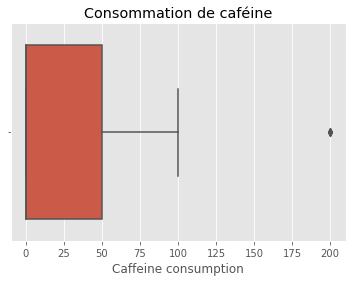

In [261]:
sns.boxplot(df["Caffeine consumption"]).set_title("Consommation de caféine");

Ici, nous avons le Boîte à moustache de la Consommation de caféine.

C:\Users\alaak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


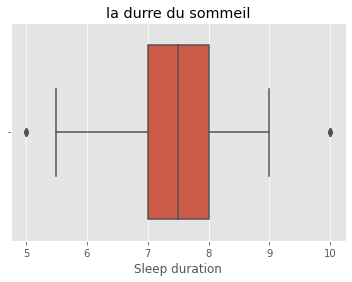

In [263]:
sns.boxplot(df["Sleep duration"]).set_title("la durre du sommeil");

Ici, nous avons le Boîte à moustache de la durré du sommeil.

C:\Users\alaak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


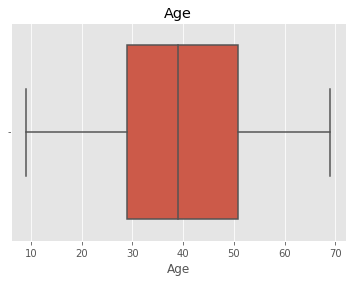

In [265]:
sns.boxplot(df["Age"]).set_title("Age");

Ici, nous avons le Boîte à moustache d'age.

Text(0.5, 1.0, 'Efficacité du sommeil')

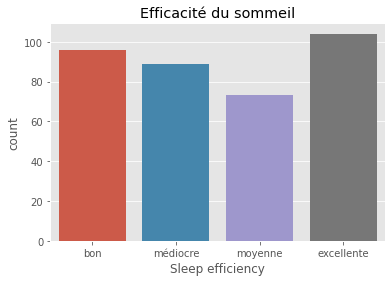

In [267]:
custom_labels = ['bon', 'médiocre', 'moyenne','excellente']
r=sns.countplot(data=df, x='Sleep efficiency')
r.set_xticklabels(custom_labels)
r.set_title('Efficacité du sommeil')

Ici, nous avons le Diagramme à barre de l'Efficacité du sommeil.

In [269]:
print(df.columns.tolist())

['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']


J'ai créé un graphique de comptage à l'aide de seaborn,

In [271]:
sport={0:'Aucun exercice',1:'Exercice très rare',2:'Exercice peu fréquent',3:'Exercice modéré',4:'Exercice régulier',5:' Exercice très fréquent'}
df_test=df
df_test['Exercise frequency']=df_test['Exercise frequency'].map(sport)

In [272]:
df_test.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,Bonne efficacité du sommeil.,18,70,12,0.0,0.0,0.0,Yes,Exercice modéré
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,Efficacité du sommeil médiocre.,19,28,53,3.0,0.0,3.0,Yes,Exercice modéré
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,Bonne efficacité du sommeil.,20,70,10,1.0,0.0,0.0,No,Exercice modéré
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,Efficacité du sommeil médiocre.,23,25,52,3.0,50.0,5.0,Yes,Exercice très rare
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,Efficacité du sommeil moyenne.,27,55,18,3.0,0.0,3.0,No,Exercice modéré


[Text(0, 0, 'modéré'),
 Text(1, 0, 'très rare'),
 Text(2, 0, 'aucun'),
 Text(3, 0, 'très fréquent'),
 Text(4, 0, 'peu fréquent'),
 Text(5, 0, 'régulier')]

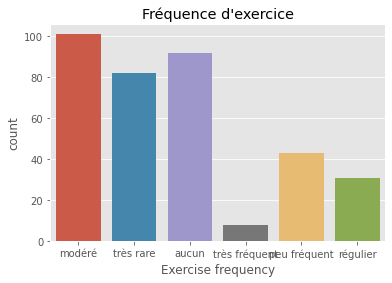

In [274]:
custom_labels1 = ['modéré', 'très rare', 'aucun','très fréquent','peu fréquent','régulier']
r=sns.countplot(data=df_test, x='Exercise frequency')
r.set_title("Fréquence d'exercice")
r.set_xticklabels(custom_labels1)

Ici, nous avons le Diagramme à barre du Fréquence d'exercice.

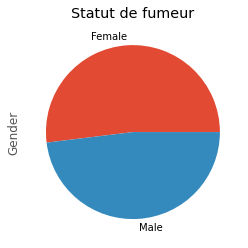

In [276]:
df['Gender'].value_counts().plot(
    kind = 'pie', 
    title = 'Statut de fumeur');

Diagramme circulaire de la variable 'Smoking status'

La majorité des personnes ne fument pas dans cet ensemble de données.

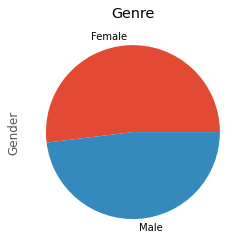

In [278]:
df['Gender'].value_counts().plot(
    kind = 'pie', 
    title = 'Genre');

Diagramme circulaire de la variable 'Gender'

Il y a autant de femmes que d'hommes, une répartition presque égale de 50/50.

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt

In [281]:
df.describe()

,ID,Age,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption
count,362.000000,362.000000,362.000000,362.000000,362.00000,362.000000,362.000000,362.000000,362.000000
mean,227.314917,39.704420,7.501381,22.696133,53.00000,24.303867,1.591160,22.928177,1.118785
std,131.502379,13.143084,0.873984,3.545734,15.47798,15.165621,1.384012,30.956413,1.616991
min,1.000000,9.000000,5.000000,15.000000,20.00000,7.000000,0.000000,0.000000,0.000000
25%,116.250000,29.000000,7.000000,20.000000,51.25000,15.000000,0.000000,0.000000,0.000000
50%,226.000000,39.000000,7.500000,22.000000,58.00000,18.000000,1.000000,0.000000,0.000000
75%,343.750000,50.750000,8.000000,25.000000,63.00000,22.000000,3.000000,50.000000,2.000000
max,451.000000,69.000000,10.000000,30.000000,75.00000,63.000000,4.000000,200.000000,5.000000


In [282]:
df.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,Bonne efficacité du sommeil.,18,70,12,0.0,0.0,0.0,Yes,Exercice modéré
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,Efficacité du sommeil médiocre.,19,28,53,3.0,0.0,3.0,Yes,Exercice modéré
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,Bonne efficacité du sommeil.,20,70,10,1.0,0.0,0.0,No,Exercice modéré
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,Efficacité du sommeil médiocre.,23,25,52,3.0,50.0,5.0,Yes,Exercice très rare
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,Efficacité du sommeil moyenne.,27,55,18,3.0,0.0,3.0,No,Exercice modéré


In [283]:
df1=pd.DataFrame(sheet)

In [284]:
values={'Awakenings':0,'Caffeine consumption':0}
df1.fillna(value=values,inplace=True)

In [285]:
df1=df1.dropna(subset=['Sleep efficiency'])

Pour visualiser les corrélations entre les variables de mon DataFrame.J'ai généré une carte de chaleur (heatmap)

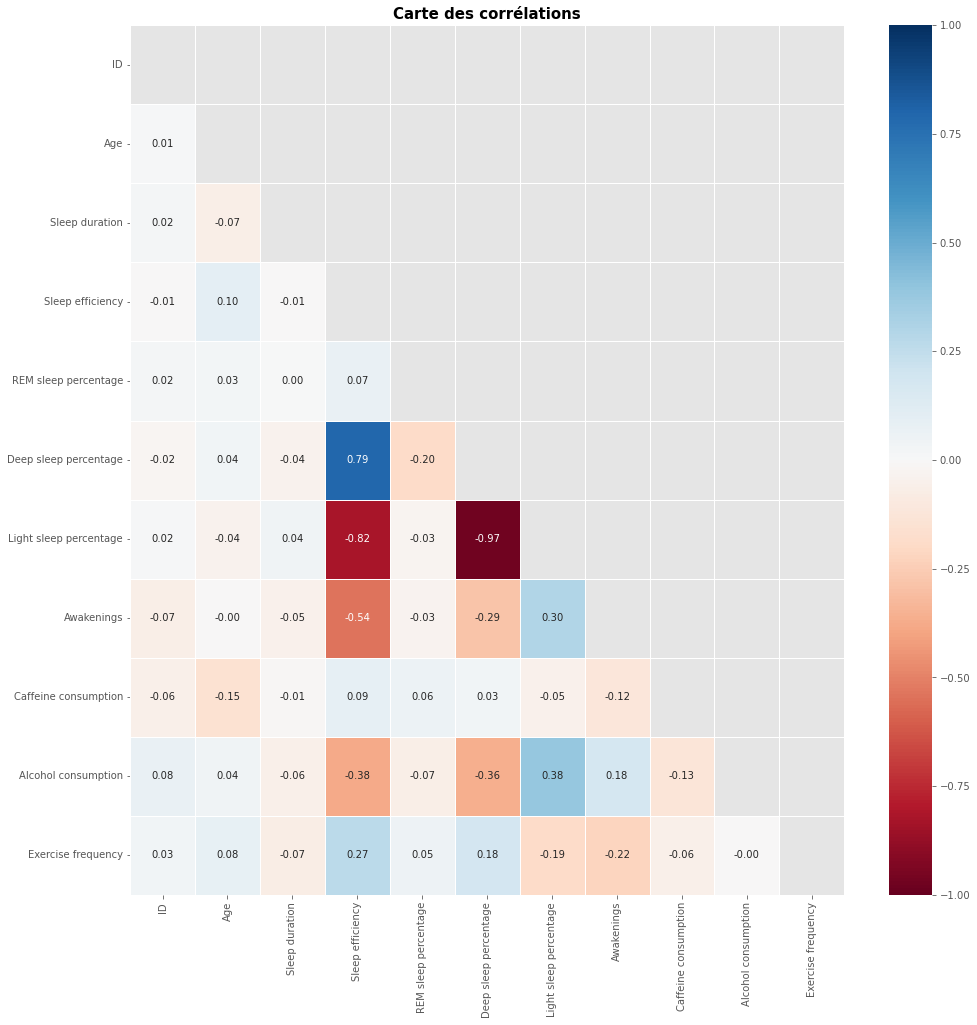

In [286]:
plt.figure(figsize = (16, 16))

mask = np.triu(np.ones_like(df1.corr(), dtype=bool))

sns.heatmap(df1.corr(), mask=mask, center=0, 
            cmap='RdBu', linewidths=1, annot=True, 
            fmt=".2f", vmin=-1, vmax=1)

plt.title('Carte des corrélations', fontsize=15, fontweight="bold")

plt.show()

In [287]:
df.head(0)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency


Pour examiner la relation entre le nombre de réveils et l'efficacité du sommeil dans mon DataFrame.J'ai tracé un nuage de points avec une régression linéaire désactivée

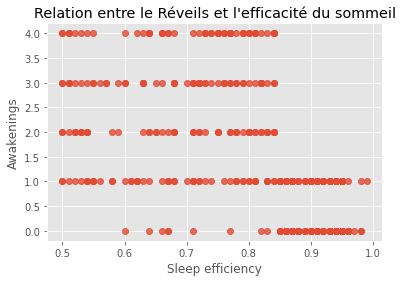

In [288]:
sns.regplot(
    x="Sleep efficiency", 
    y="Awakenings", 
    fit_reg=False, 
    data=df1).set_title("Relation entre le Réveils et l'efficacité du sommeil");

Lorsque l'efficacité du sommeil est élevée, cela semble être associé à un niveau de stress plus bas, tandis que lorsque l'efficacité du sommeil diminue, le niveau de stress tend à augmenter. Cette observation suggère une relation inverse entre l'efficacité du sommeil et le niveau de stress perçu, où une meilleure qualité de sommeil semble être liée à une réduction du stress et vice versa.

J'ai tracé un nuage de points sans ajustement de régression linéaire pour examiner la relation entre le pourcentage de sommeil profond et l'efficacité du sommeil dans le jeu de données.

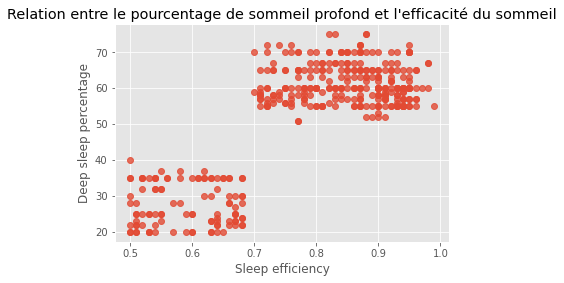

In [289]:
sns.regplot(
    x="Sleep efficiency", 
    y="Deep sleep percentage", 
    fit_reg=False, 
    data=df1).set_title("Relation entre le pourcentage de sommeil profond et l'efficacité du sommeil");

Lorsque l'efficacité du sommeil est élevée, il semble que le pourcentage de sommeil profond soit également élevé, et vice versa. Cette observation suggère une relation inverse entre l'efficacité du sommeil et le pourcentage de sommeil profond, où une meilleure qualité de sommeil est associée à une proportion plus élevée de sommeil profond, et une efficacité du sommeil réduite est liée à une diminution du temps passé en sommeil profond.

J'ai généré un nuage de points avec une régression linéaire désactivée pour explorer la relation entre la consommation d'alcool et l'efficacité du sommeil dans le jeu de données. 

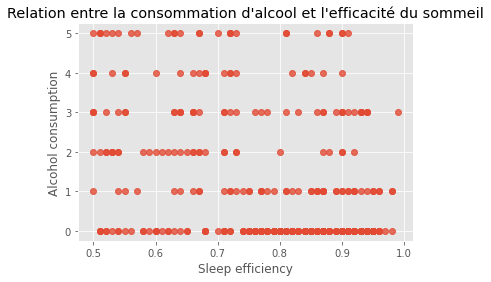

In [290]:
sns.regplot(
    x="Sleep efficiency", 
    y="Alcohol consumption", 
    fit_reg=False, 
    data=df1).set_title("Relation entre la consommation d'alcool et l'efficacité du sommeil");

Lorsque l'efficacité du sommeil est élevée, il semble que la quantité d'alcool consommée soit généralement plus faible, tandis que lorsque l'efficacité du sommeil diminue, on observe souvent une augmentation de la consommation d'alcool. Cette tendance suggère une relation inverse entre l'efficacité du sommeil et la consommation d'alcool, où une meilleure qualité de sommeil est associée à une réduction de la consommation d'alcool, et inversement.

Tableau de contingence entre les variables 'Sleep efficiency' et 'Exercise frequency'

In [291]:
pd.crosstab(df["Sleep efficiency"], df["Exercise frequency"])

Exercise frequency,Exercice très fréquent,Aucun exercice,Exercice modéré,Exercice peu fréquent,Exercice régulier,Exercice très rare
Sleep efficiency,,,,,,
Bonne efficacité du sommeil.,2,16,26,19,6,25
Efficacité du sommeil excellente,5,18,31,11,20,18
Efficacité du sommeil moyenne.,0,22,24,6,3,17
Efficacité du sommeil médiocre.,1,36,20,7,2,22


On peut en conclure que les individus qui pratiquent régulièrement une activité physique modérée présentent en moyenne une qualité de sommeil acceptable.

In [292]:
df.head(1)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,Bonne efficacité du sommeil.,18,70,12,0.0,0.0,0.0,Yes,Exercice modéré


Tableau de contingence entre les variables 'Sleep efficiency' et 'Smoking status'

In [293]:
pd.crosstab(df["Sleep efficiency"], df["Smoking status"])

Smoking status,No,Yes
Sleep efficiency,,
Bonne efficacité du sommeil.,61,35
Efficacité du sommeil excellente,78,26
Efficacité du sommeil moyenne.,56,17
Efficacité du sommeil médiocre.,41,48


Je vais changer les valeurs dans la colonne 'Age' en utilisant cette échelle :
    Nourrissons et tout-petits : 0-2 ans
    Enfants d'âge préscolaire : 3-5 ans
    Enfants d'âge scolaire : 6-12 ans
    Adolescents : 13-19 ans
    Jeunes adultes : 20-29 ans
    Adultes d'âge moyen : 30-59 ans
    Adultes âgés : 60 ans et plus

In [294]:
def replace_age_category(age):
    if age <= 2:
        return "Nourrissons et tout-petits"
    elif 3 <= age <= 5:
        return "Enfants d'âge préscolaire"
    elif 6 <= age <= 12:
        return "Enfants d'âge scolaire"
    elif 13 <= age <= 19:
        return "Adolescents"
    elif 20 <= age <= 29:
        return "Jeunes adultes"
    elif 30 <= age <= 59:
        return "Adultes d'âge moyen"
    else:
        return "Adultes âgés"
age_mapping = {age: replace_age_category(age) for age in df['Age'].unique()}
df['Age'] = df['Age'].map(age_mapping)

In [295]:
df.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,Adultes âgés,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,Bonne efficacité du sommeil.,18,70,12,0.0,0.0,0.0,Yes,Exercice modéré
1,2,Adultes âgés,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,Efficacité du sommeil médiocre.,19,28,53,3.0,0.0,3.0,Yes,Exercice modéré
2,3,Adultes d'âge moyen,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,Bonne efficacité du sommeil.,20,70,10,1.0,0.0,0.0,No,Exercice modéré
3,4,Adultes d'âge moyen,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,Efficacité du sommeil médiocre.,23,25,52,3.0,50.0,5.0,Yes,Exercice très rare
4,5,Adultes d'âge moyen,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,Efficacité du sommeil moyenne.,27,55,18,3.0,0.0,3.0,No,Exercice modéré


Tableau de contingence entre les variables 'Sleep efficiency' et 'Age'

In [296]:
pd.crosstab(df["Sleep efficiency"], df["Age"])

Age,Adolescents,Adultes d'âge moyen,Adultes âgés,Enfants d'âge scolaire,Jeunes adultes
Sleep efficiency,,,,,
Bonne efficacité du sommeil.,3,67,2,0,24
Efficacité du sommeil excellente,1,78,6,0,19
Efficacité du sommeil moyenne.,0,45,10,0,18
Efficacité du sommeil médiocre.,6,42,10,4,27


Les adultes d'âge moyen ont au moins une efficacité de sommeil moyenne.

Je vais créer un diagramme illustrant l'efficacité du sommeil en fonction du statut tabagique.

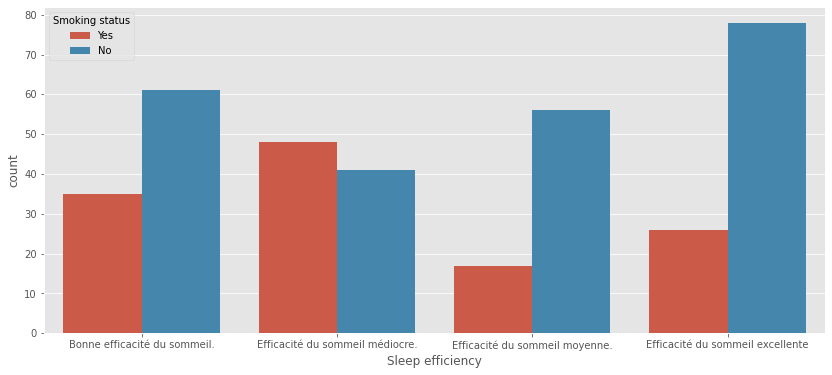

In [297]:
plt.figure(figsize=(14, 6))

sns.countplot(x = 'Sleep efficiency', hue = 'Smoking status', data = df);

Ce diagramme suggère que le statut tabagique a un impact négatif sur l'efficacité du sommeil.

Je vais créer un diagramme illustrant l'efficacité du sommeil en fonction du Genre.

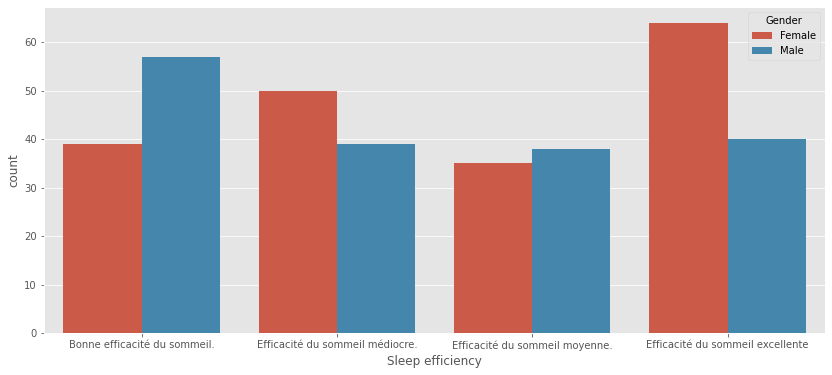

In [298]:
plt.figure(figsize=(14, 6))

sns.countplot(x = 'Sleep efficiency', hue = 'Gender', data = df);

Je vais créer un diagramme illustrant l'efficacité du sommeil en fonction du Fréquence d'exercice.

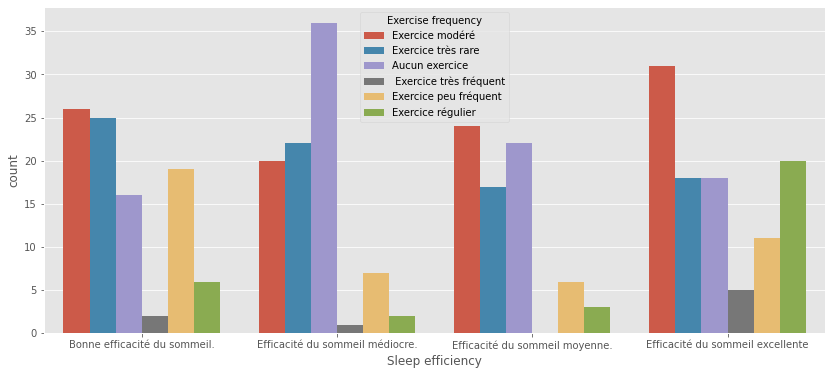

In [299]:
plt.figure(figsize=(14, 6))

sns.countplot(x = 'Sleep efficiency', hue = 'Exercise frequency', data = df);

Distribution de l'efficacité du sommeil par rapport à la consommation de caféine et au statut tabagique

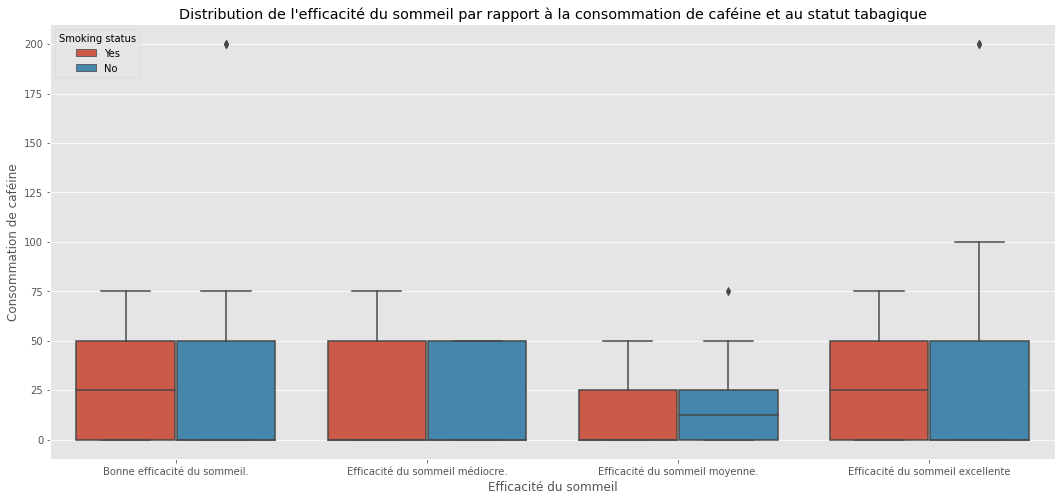

In [300]:
plt.figure(figsize=(18, 8))

sns.boxplot(x='Sleep efficiency', y='Caffeine consumption', hue='Smoking status', data=df)

plt.xlabel('Efficacité du sommeil')
plt.ylabel('Consommation de caféine')
plt.title('Distribution de l\'efficacité du sommeil par rapport à la consommation de caféine et au statut tabagique')

plt.show()


Distribution des réveils en fonction de la fréquence de l'exercice

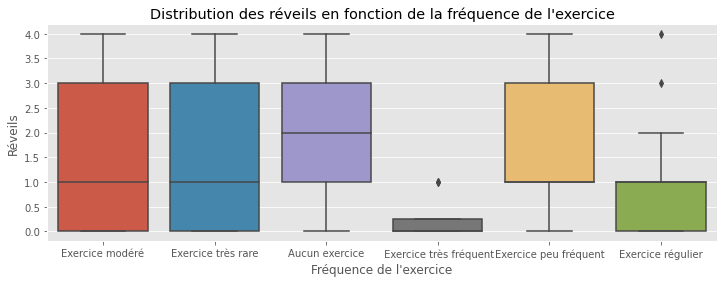

In [301]:
plt.figure(figsize=(12, 4))

sns.boxplot(x='Exercise frequency', y='Awakenings', data=df)

plt.xlabel('Fréquence de l\'exercice')
plt.ylabel('Réveils')
plt.title('Distribution des réveils en fonction de la fréquence de l\'exercice')

plt.show()


In [302]:
df1["Exercise frequency"].mean()

1.7825

In [303]:
d1={'Exercise frequency':'Exercice modéré'}
df=df.fillna(value=d1)

Ici, je vais utiliser le DataFrame df1 qui contient d'avantage de variables numériques afin de pouvoir effectuer le clustering.
Je vais vérifier s'il y a des valeurs nulles dans mon jeu de données avant de procéder au clustering.


In [304]:
df1.isna().sum() 

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration            44
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                 0
Caffeine consumption       0
Alcohol consumption       12
Smoking status             0
Exercise frequency         6
dtype: int64

In [305]:
d2={"Sleep duration":7.5,"Alcohol consumption":0.0 ,'Exercise frequency':0}
df1=df1.fillna(value=d2)

In [306]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)

In [307]:
df1.isna().sum() 

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

je vais effectué une opération de clustering sur les variables "Efficacité du sommeil" et "Réveils" à l'aide de l'algorithme K-means. 

In [308]:
clusters_1 = km.fit_predict(df1[['Sleep efficiency', 'Awakenings']])
df1['Cluster'] = clusters_1
df_1 = df1[df1.Cluster == 0]
df_2 = df1[df1.Cluster == 1]
df_3 = df1[df1.Cluster == 2]

In [309]:
df_2.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Cluster
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,1
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,0.0,0.0,No,1.0,1
7,8,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.0,0.90,28,52,20,0.0,50.0,0.0,Yes,3.0,1
11,12,55,Male,2021-03-10 22:30:00,2021-03-10 06:00:00,7.5,0.93,18,60,22,0.0,0.0,0.0,No,3.0,1
12,13,30,Female,2021-08-07 02:30:00,2021-08-07 11:30:00,9.0,0.93,24,58,18,0.0,50.0,0.0,No,1.0,1


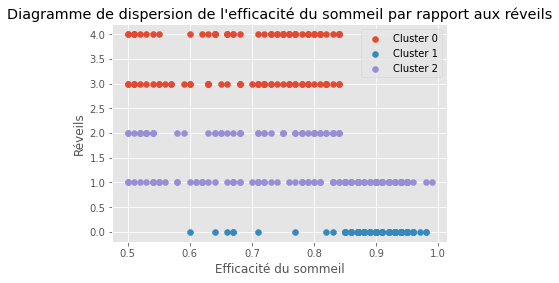

In [310]:
plt.scatter(df_1['Sleep efficiency'], df_1['Awakenings'], label='Cluster 0')

plt.scatter(df_2['Sleep efficiency'], df_2['Awakenings'], label='Cluster 1')

plt.scatter(df_3['Sleep efficiency'], df_3['Awakenings'], label='Cluster 2')

plt.xlabel('Efficacité du sommeil')
plt.ylabel('Réveils')
plt.title('Diagramme de dispersion de l\'efficacité du sommeil par rapport aux réveils')
plt.legend()


plt.show()


On peut conclure que le nombre de réveils a une grande influence sur l'efficacité du sommeil, comme le montrent les données divisées en trois clusters:
1.Cluster 0 :
Dans ce cluster, on observe une efficacité du sommeil relativement élevée, associée à un nombre trés faible  de réveils. Cela suggère que Les individus bénéficiant d'une efficacité de sommeil élevée présentent également un nombre de réveils très bas.

2.Cluster 1 :
Ce cluster présente une efficacité du sommeil moyenne à faible, avec un nombre de réveils élevé. Cela pourrait indiquer un groupe de personnes ayant des problèmes de sommeil et un sommeil moins réparateur.

3.Cluster 2 :
Dans ce cluster, on observe une efficacité du sommeil variable avec un nombre variable de réveils. Cela pourrait représenter un groupe hétérogène avec des schémas de sommeil divers, allant de bons à mauvais, et différents niveaux de perturbations nocturnes.

je vais effectué une opération de clustering sur les variables "Efficacité du sommeil" et "Pourcentage du sommeil profond" à l'aide de l'algorithme K-means. 

In [311]:
km=KMeans(n_clusters=2)
clusters_1 = km.fit_predict(df1[['Sleep efficiency', 'Deep sleep percentage']])
df1['Cluster'] = clusters_1
df2_1 = df1[df1.Cluster == 0]
df2_2 = df1[df1.Cluster == 1]

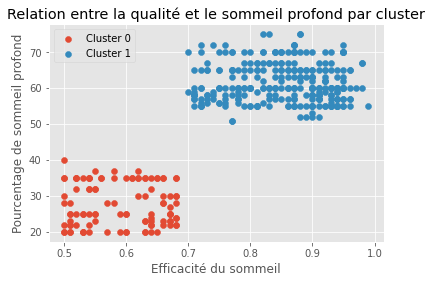

In [312]:
plt.scatter(df2_1['Sleep efficiency'], df2_1['Deep sleep percentage'], label='Cluster 0')

plt.scatter(df2_2['Sleep efficiency'], df2_2['Deep sleep percentage'], label='Cluster 1')


plt.xlabel('Efficacité du sommeil')
plt.ylabel('Pourcentage de sommeil profond')
plt.title('Relation entre la qualité et le sommeil profond par cluster')
plt.legend()


plt.show()


On peut conclure que le pourcentage du someeil profond a une grande influence sur l'efficacité du sommeil.